Raditi će se na istoj bazi podataka kao i na labosu, opet, radi usporedbe. Originalno je planirao raditi klasifikaciju za objekte od Intel Image Classification repozetorija slika ali radi lakšeg shvaćanja kolika je razlika u brzini i preciznosti modela koristi se već poznata grupa podataka.

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import keras

In [ ]:
(a_train, b_train), (a_test, b_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Prikupljanje podataka, koristi se  a i b umjesto x i y jer preferiram takvu konveciju.

In [11]:
a_train = a_train.astype('float32') / 255.0
a_test = a_test.astype('float32') / 255.0


In [12]:
b_train = to_categorical(b_train, 10)
b_test = to_categorical(b_test, 10)

In [13]:
temelj = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

<ipython-input-13-57cf84fae496>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  temelj = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Ovo je već unaprijed definirana arhitektura pa ovaj stil iznad teksta i ispod je temeljen kako ostali to rade. Dosta je općit i predefiniran pa daljna elaboracija o načinu do kojeg se ovo stvorilo je nebitan. U PDFu je dublje opisano točnije šta kod radi.

In [14]:
a = GlobalAveragePooling2D()(temelj.output)
predikcijski_sloj = Dense(10, activation='softmax')(a)
model = Model(inputs=temelj.input, outputs=predikcijski_sloj)

prvo test bes temelja

In [ ]:
# Prvo treniranje samo klasifikacije
for layer in temelj.layers:
    layer.trainable = False

# kompajliraj
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Samo njih na 5 epoha
print("Training classification head...")
history = model.fit(
    a_train, b_train,
    batch_size=64,
    epochs=5,
    validation_data=(a_test, b_test),
    verbose=1
)

Training classification head...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.1440 - loss: 2.2861 - val_accuracy: 0.2066 - val_loss: 2.2305
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2274 - loss: 2.2146 - val_accuracy: 0.2443 - val_loss: 2.1739
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2573 - loss: 2.1625 - val_accuracy: 0.2643 - val_loss: 2.1307
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2714 - loss: 2.1186 - val_accuracy: 0.2742 - val_loss: 2.0970
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2776 - loss: 2.0875 - val_accuracy: 0.2826 - val_loss: 2.0704


In [ ]:
# Prvo treniranje samo klasifikacije
for layer in temelj.layers:
    layer.trainable = True

# kompajliraj
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Samo njih na 5 epoha
print("Training classification head...")
sve_trenirano = model.fit(
    a_train, b_train,
    batch_size=64,
    epochs=10,
    validation_data=(a_test, b_test),
    verbose=1
)

Training classification head...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.3000 - loss: 2.2285 - val_accuracy: 0.1538 - val_loss: 3.0427
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5300 - loss: 1.3501 - val_accuracy: 0.3253 - val_loss: 1.9438
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6092 - loss: 1.1190 - val_accuracy: 0.5730 - val_loss: 1.2764
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6584 - loss: 0.9717 - val_accuracy: 0.6372 - val_loss: 1.0979
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7044 - loss: 0.8485 - val_accuracy: 0.6798 - val_loss: 0.9303
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.7373 - loss: 0.7517 - val_accuracy: 0.6972 - val_loss: 0.8708
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.7631 - loss: 0.6756 - val_accuracy: 0.7290 - val_loss: 0.8101
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - ac

In [ ]:
loss, accuracy = model.evaluate(a_test, b_test, verbose=1)
print(f"Preciznost: {accuracy:.4f}")

# Save the model
keras.saving.save_model(model, 'mobilenetv2.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7572 - loss: 0.7774
Preciznost: 0.7573


Vidi se da je preciznost 0.7573 tj 75.53%, više nego sa laboratorijskih vježbi i znatno brži.

Sada ide EffectiveNet, koriste se iste varijable radi prakticnosti trenira se na skoro isti način pa je samo copy paste većinu stvari od prošlog. Svakako se pamte zavrsi podatci za krajnju usporedbu.

In [ ]:
#Sve identično kao i prije
(a_train, b_train), (a_test, b_test) = cifar10.load_data()


a_train = a_train.astype('float32') / 255.0
a_test = a_test.astype('float32') / 255.0


b_train = to_categorical(b_train, 10)
b_test = to_categorical(b_test, 10)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(a_train)

Ovo mi preporučio GPT, da bi pomoglo pri kvaliteti preciznosti modela, pa će se probati.

In [ ]:
temelj = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
for layer in temelj.layers:
    layer.trainable = False

In [ ]:
a = GlobalAveragePooling2D()(temelj.output)
predikcijski_sloj = Dense(10, activation='softmax')(a)
model = Model(inputs=temelj.input, outputs=predikcijski_sloj)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
pocetno = model.fit(
    a_train, b_train,
    batch_size=64,
    epochs=5,
    validation_data=(a_test, b_test),
    verbose=1
)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.1013 - loss: 2.3102 - val_accuracy: 0.1000 - val_loss: 2.3041
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.1047 - loss: 2.3058 - val_accuracy: 0.1030 - val_loss: 2.3048
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1000 - loss: 2.3057 - val_accuracy: 0.1000 - val_loss: 2.3046
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0963 - loss: 2.3056 - val_accuracy: 0.1000 - val_loss: 2.3055
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.0999 - loss: 2.3054 - val_accuracy: 0.1104 - val_loss: 2.3039


Preciznost nakon što su se smrznuli slojevi koji se mogu trenirati je dosta loš, vjerojatno do arhitekture EfficientNeta

In [ ]:
for layer in temelj.layers:
    layer.trainable = True

# kompajliraj
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Samo njih na 5 epoha
print("Glavno")
sve_trenirano = model.fit(
    a_train, b_train,
    batch_size=64,
    epochs=10,
    validation_data=(a_test, b_test),
    verbose=1
)

Glavno
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 125s 71ms/step - accuracy: 0.3270 - loss: 1.9615 - val_accuracy: 0.3870 - val_loss: 1.8952
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 21ms/step - accuracy: 0.6323 - loss: 1.0527 - val_accuracy: 0.6904 - val_loss: 0.8887
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.7083 - loss: 0.8321 - val_accuracy: 0.7374 - val_loss: 0.7725
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.7611 - loss: 0.6842 - val_accuracy: 0.7549 - val_loss: 0.7120
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.7954 - loss: 0.5796 - val_accuracy: 0.7740 - val_loss: 0.6711
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8283 - loss: 0.4939 - val_accuracy: 0.7888 - val_loss: 0.6454
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8466 - loss: 0.4312 - val_accuracy: 0.7882 - val_loss: 0.6498
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8745 - loss: 0

In [ ]:
loss, accuracy = model.evaluate(a_test, b_test, verbose=1)
print(f"Preciznost: {accuracy:.4f}")

# Save the model
model.save('efficientnetb0_cifar10.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7940 - loss: 0.6815


Preciznost: 0.7950


In [10]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(a_test)
predict_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [2]:
grupe = [
    "avion", "automobil", "ptica", "mačka", "jelen",
    "pas", "žaba", "konj", "brod", "kamion"
]

In [ ]:
predicted_index = predict_classes[1]
predicted_name = grupe[predicted_index]
print(f"Predicted class: {predicted_name}")

Predicted class: brod


Nešto brže od prošlog modela ali zato i malo sporije.

In [ ]:
efficientnet_model = load_model('efficientnetb0_cifar10.h5')
mobilenet_model = load_model('/content/visualmodels/rezultati/mobilenetv2.keras')

In [5]:
(a_train, b_train), (a_test, b_test) = cifar10.load_data()
a_train = a_train.astype('float32') / 255.0
a_test = a_test.astype('float32') / 255.0
b_train = to_categorical(b_train, 10)
b_test = to_categorical(b_test, 10)

temelj = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = GlobalAveragePooling2D()(temelj.output)
predikcija = Dense(10, activation='softmax')(x)
model = Model(inputs=temelj.input, outputs=predikcija)

for layer in temelj.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    a_train, b_train,
    batch_size=64,
    epochs=10,
    validation_data=(a_test, b_test),
    verbose=1
)

for layer in temelj.layers:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(
    a_train, b_train,
    batch_size=64,
    epochs=10,
    validation_data=(a_test, b_test),
    verbose=1
)

loss, accuracy = model.evaluate(a_test, b_test, verbose=1)
print(f"Test Accuracy: {accuracy:.4f}")

model.save('resnet50_cifar10.keras')
print("Model saved as 'resnet50_cifar10.keras'")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.1846 - loss: 2.2783 - val_accuracy: 0.2524 - val_loss: 2.0264
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.2899 - loss: 1.9739 - val_accuracy: 0.3088 - val_loss: 1.9077
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3149 - loss: 1.9000 - val_accuracy: 0.3553 - val_loss: 1.8275
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3404 - loss: 1.8556 - val_accuracy: 0.3376 - val_loss: 1.8576
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.3498 - loss: 1.8290 - val_accuracy: 0.3654 - val_loss: 1.8097
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.3558 - loss: 1.8058 - val_accuracy: 0.3529 - val_loss: 1.8085
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3694 - loss: 1.7848 - val_accuracy: 0.3839 - val_l

In [7]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(a_test)
predict_classes = np.argmax(predictions, axis=1)

predicted_index = predict_classes[1]
predicted_name = grupe[predicted_index]
print(f"Predicted class: {predicted_name}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step
Predicted class: brod


In [8]:
efficientnet_model = load_model('efficientnetb0_cifar10.h5')
mobilenet_model = load_model('mobilenetv2.keras')
resnet_model = load_model('resnet50_cifar10.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


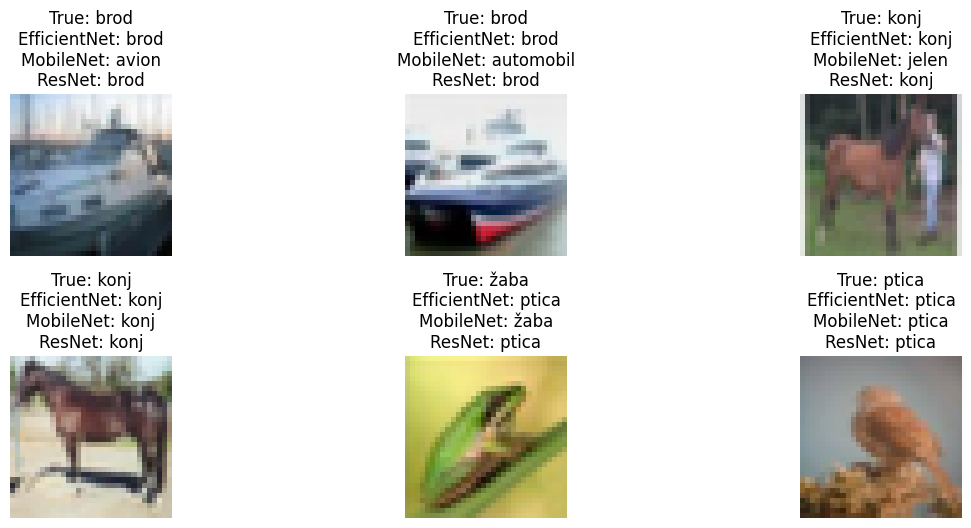

In [9]:
# Select multiple random indices
random_indices = [2, 1, 634, 732, 112 , 113]

# Plot the images and predictions
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

for i, random_index in enumerate(random_indices):
    image = a_test[random_index]
    true_label = grupe[np.argmax(b_test[random_index])]

    # Model predictions
    efficientnet_pred = efficientnet_model.predict(np.expand_dims(image, axis=0))
    mobilenet_pred = mobilenet_model.predict(np.expand_dims(image, axis=0))
    resnet_pred = resnet_model.predict(np.expand_dims(image, axis=0))

    efficientnet_label = grupe[np.argmax(efficientnet_pred)]
    mobilenet_label = grupe[np.argmax(mobilenet_pred)]
    resnet_label = grupe[np.argmax(resnet_pred)]

    # Display the image with predictions
    plt.subplot(3, 3, i + 1)  # Create a 2x2 grid for the 4 images
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"True: {true_label}\nEfficientNet: {efficientnet_label}\nMobileNet: {mobilenet_label}\nResNet: {resnet_label}")

plt.tight_layout()
plt.show()